In [43]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [44]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [45]:
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: c.replace('config.', ''), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df.head()

max_possible_throughput  expected_throughput  avg_throughput  \
0                      3.0                  0.3        0.294525   
1                      3.0                  0.3        0.286272   
2                      3.0                  0.3        0.291268   
3                      3.0                  0.3        0.291926   
4                      3.0                  0.3        0.297490   

                      controller  \
0  <class 'QLearning.QLearning'>   
1  <class 'QLearning.QLearning'>   
2  <class 'QLearning.QLearning'>   
3  <class 'QLearning.QLearning'>   
4  <class 'QLearning.QLearning'>   

                                               state mission_size num_agents  \
0  <class 'state.CommunicationMobilityPacketsState'>           10          4   
1  <class 'state.CommunicationMobilityPacketsState'>           10          4   
2  <class 'state.CommunicationMobilityPacketsState'>           10          4   
3  <class 'state.CommunicationMobilityPacketsState'>           10          4   
4  <class 'state.CommunicationMobilityPacketsState'>           10          4   

  sensor_generation_frequency sensor_generation_probability  \
0                           3                           0.1   
1                           3                           0.1   
2                           3                           0.1   
3                           3                           0.1   
4                           3                           0.1   

  sensor_packet_lifecycle  ...  \
0                     inf  ...   
1                     inf  ...   
2                     inf  ...   
3                     inf  ...   
4                     inf  ...   

                                   reward_function  \
0  <function unique_packets at 0x0000021FC50E5260>   
1  <function unique_packets at 0x0000021FC50E5260>   
2  <function unique_packets at 0x0000021FC50E5260>   
3  <function unique_packets at 0x0000021FC50E5260>   
4  <function unique_packets at 0x0000021FC50E5260>   

  qtable_initialization_value qtable_file                     qtable_format  \
0                           0    119.json  <class 'QLearning.SparseQTable'>   
1                           0    119.json  <class 'QLearning.SparseQTable'>   
2                           0    119.json  <class 'QLearning.SparseQTable'>   
3                           0    119.json  <class 'QLearning.SparseQTable'>   
4                           0    119.json  <class 'QLearning.SparseQTable'>   

  training testing_repetitions step_by_step  plots verbose  \
0    False                  25        False  False   False   
1    False                  25        False  False   False   
2    False                  25        False  False   False   
3    False                  25        False  False   False   
4    False                  25        False  False   False   

  controller.avg_reward  
0                0.0282  
1                0.0267  
2                0.0280  
3                0.0285  
4                0.0274  

[5 rows x 25 columns]

In [46]:
variable_columns = result_file['campaign_variables']
variable_columns

['maximum_simulation_steps', 'mission_size', 'num_agents', 'training']

In [47]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

campaign_id  max_possible_throughput  expected_throughput  avg_throughput  \
0            0                      3.0                  0.3        0.294525   
1            1                      3.0                  0.3        0.286272   
2            2                      3.0                  0.3        0.291268   
3            3                      3.0                  0.3        0.291926   
4            4                      3.0                  0.3        0.297490   

                      controller  \
0  <class 'QLearning.QLearning'>   
1  <class 'QLearning.QLearning'>   
2  <class 'QLearning.QLearning'>   
3  <class 'QLearning.QLearning'>   
4  <class 'QLearning.QLearning'>   

                                               state mission_size num_agents  \
0  <class 'state.CommunicationMobilityPacketsState'>           10          4   
1  <class 'state.CommunicationMobilityPacketsState'>           10          4   
2  <class 'state.CommunicationMobilityPacketsState'>           10          4   
3  <class 'state.CommunicationMobilityPacketsState'>           10          4   
4  <class 'state.CommunicationMobilityPacketsState'>           10          4   

  sensor_generation_frequency sensor_generation_probability  ...  \
0                           3                           0.1  ...   
1                           3                           0.1  ...   
2                           3                           0.1  ...   
3                           3                           0.1  ...   
4                           3                           0.1  ...   

                                   reward_function  \
0  <function unique_packets at 0x0000021FC50E5260>   
1  <function unique_packets at 0x0000021FC50E5260>   
2  <function unique_packets at 0x0000021FC50E5260>   
3  <function unique_packets at 0x0000021FC50E5260>   
4  <function unique_packets at 0x0000021FC50E5260>   

  qtable_initialization_value qtable_file                     qtable_format  \
0                           0    119.json  <class 'QLearning.SparseQTable'>   
1                           0    119.json  <class 'QLearning.SparseQTable'>   
2                           0    119.json  <class 'QLearning.SparseQTable'>   
3                           0    119.json  <class 'QLearning.SparseQTable'>   
4                           0    119.json  <class 'QLearning.SparseQTable'>   

  training testing_repetitions step_by_step  plots verbose  \
0    False                  25        False  False   False   
1    False                  25        False  False   False   
2    False                  25        False  False   False   
3    False                  25        False  False   False   
4    False                  25        False  False   False   

  controller.avg_reward  
0                0.0282  
1                0.0267  
2                0.0280  
3                0.0285  
4                0.0274  

[5 rows x 26 columns]

In [48]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['expected_throughput'],
    name='Expected Throughput',
    hovertemplate='<b>Expected Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(len(result_df))],
   tickvals=[i for i in range(len(result_df))],
)

fig.show()

In [49]:
result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [50]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

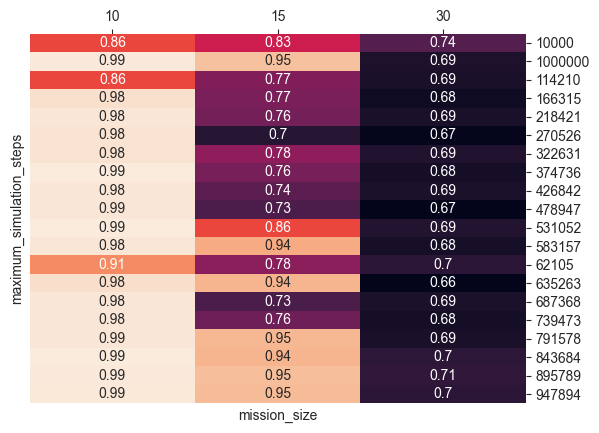

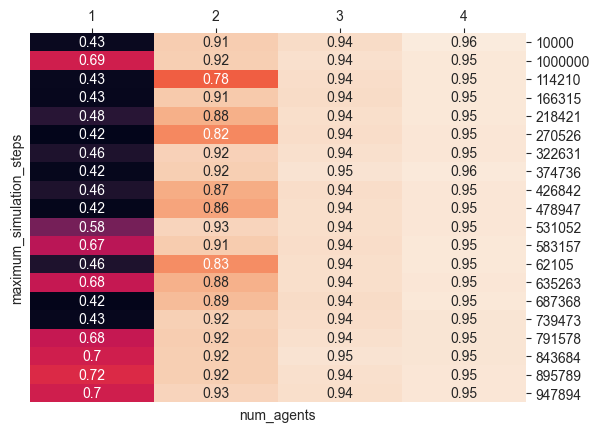

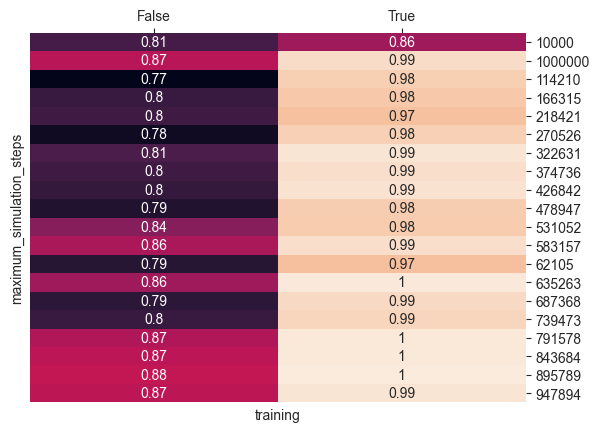

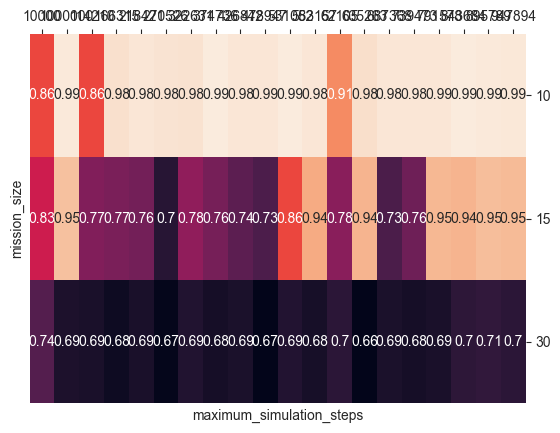

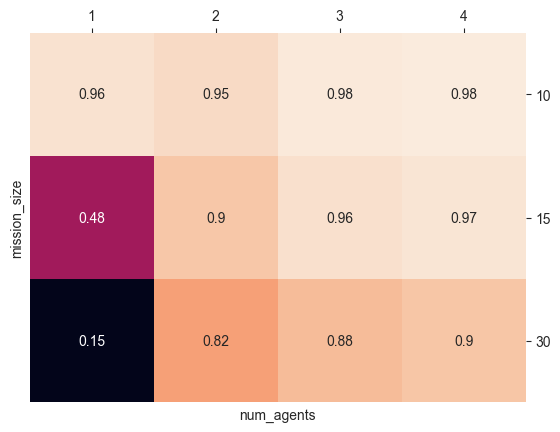

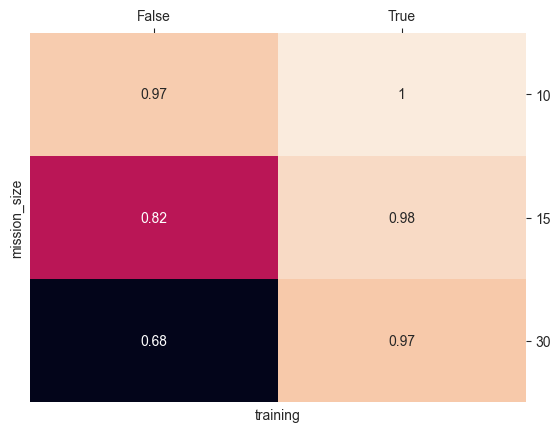

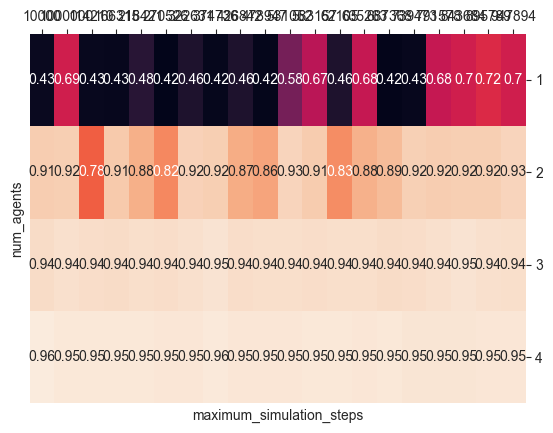

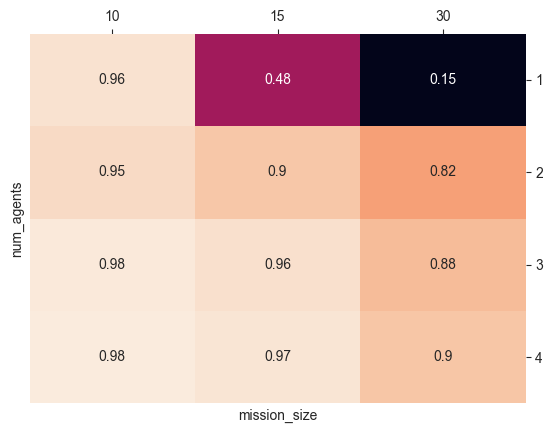

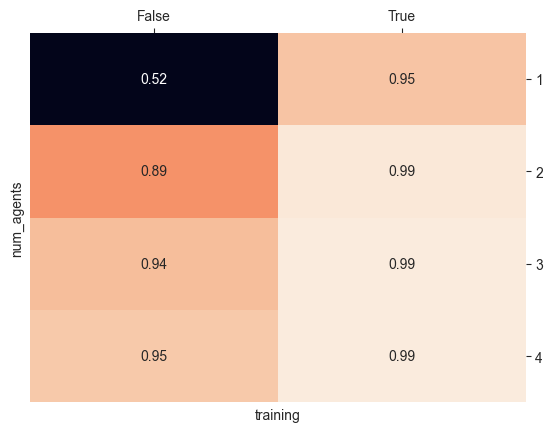

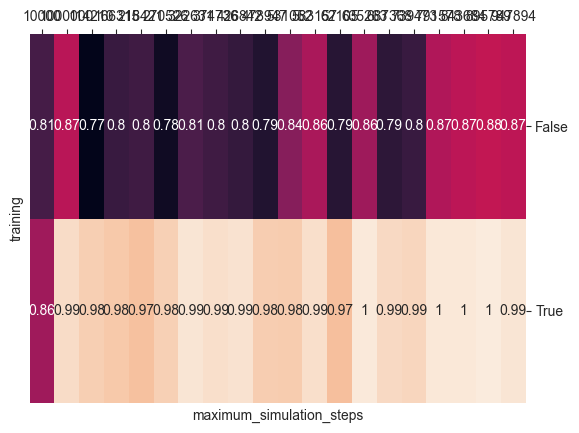

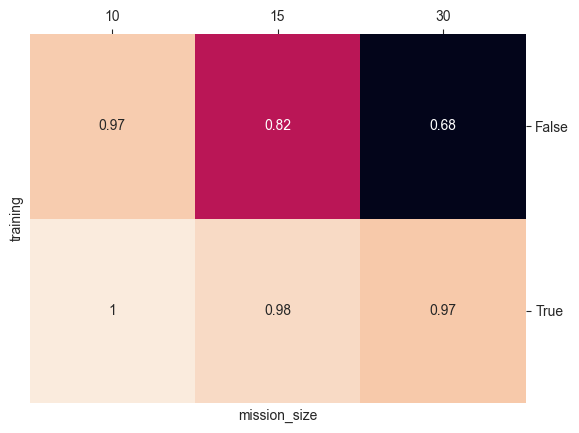

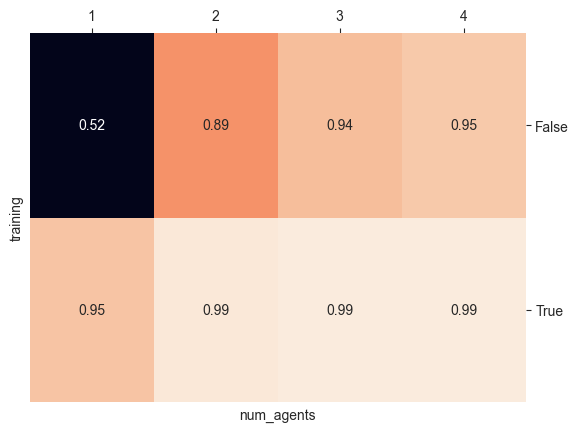

In [51]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [52]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"Avg Throughput: {result_df[result_df[column] == value]['score'].mean() :.2f}")
    print("\n")

maximum_simulation_steps = 1000000                          Avg Throughput: 0.88
maximum_simulation_steps = 791578                           Avg Throughput: 0.87
maximum_simulation_steps = 583157                           Avg Throughput: 0.87
maximum_simulation_steps = 478947                           Avg Throughput: 0.79
maximum_simulation_steps = 10000                            Avg Throughput: 0.81
maximum_simulation_steps = 531052                           Avg Throughput: 0.85
maximum_simulation_steps = 322631                           Avg Throughput: 0.82
maximum_simulation_steps = 166315                           Avg Throughput: 0.81
maximum_simulation_steps = 426842                           Avg Throughput: 0.81
maximum_simulation_steps = 947894                           Avg Throughput: 0.88
maximum_simulation_steps = 739473                           Avg Throughput: 0.81
maximum_simulation_steps = 895789                           Avg Throughput: 0.88
maximum_simulation_steps = 1

In [53]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['maximum_simulation_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])

# Analysing Q Learning training performance

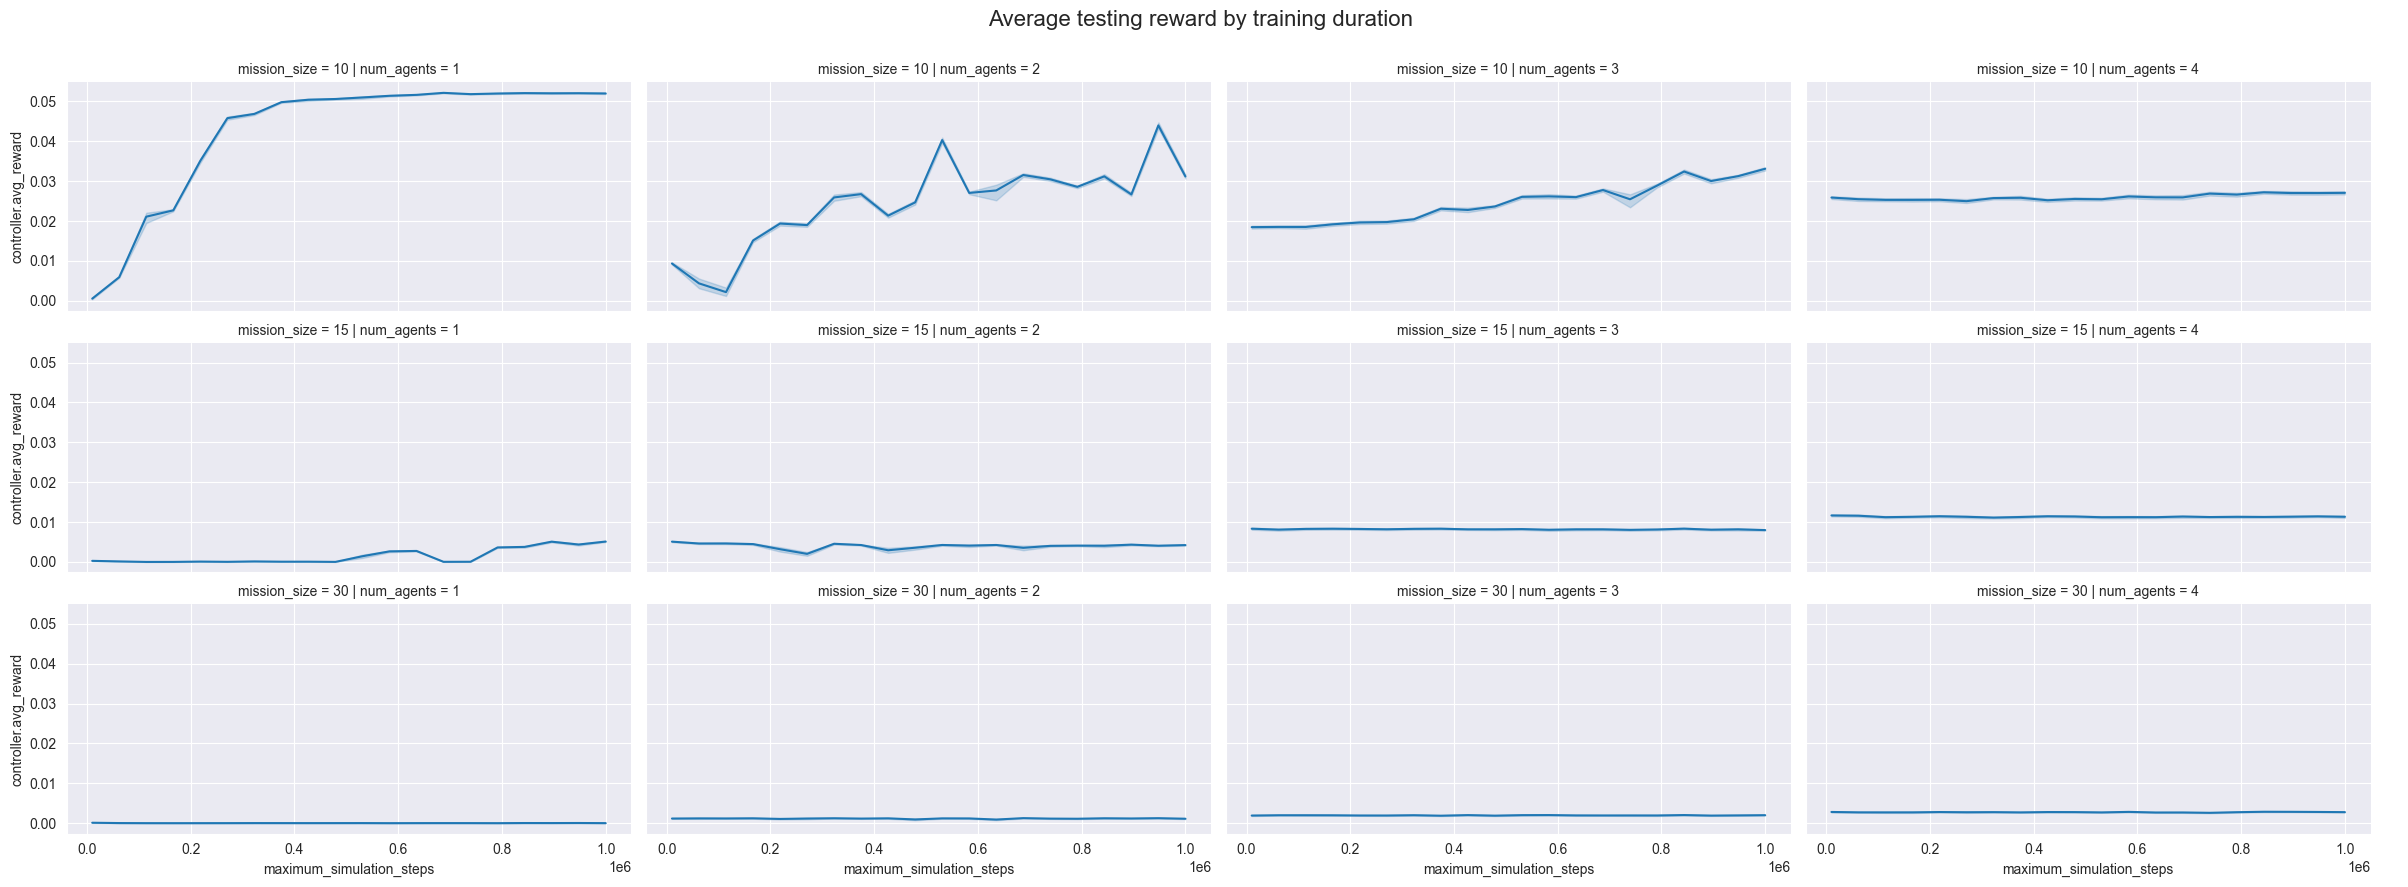

In [54]:
q_learning_testing = result_df[result_df['controller'].str.contains('QLearning') & (result_df['training'] == 'False')]

grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='controller.avg_reward')
grid.add_legend()

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

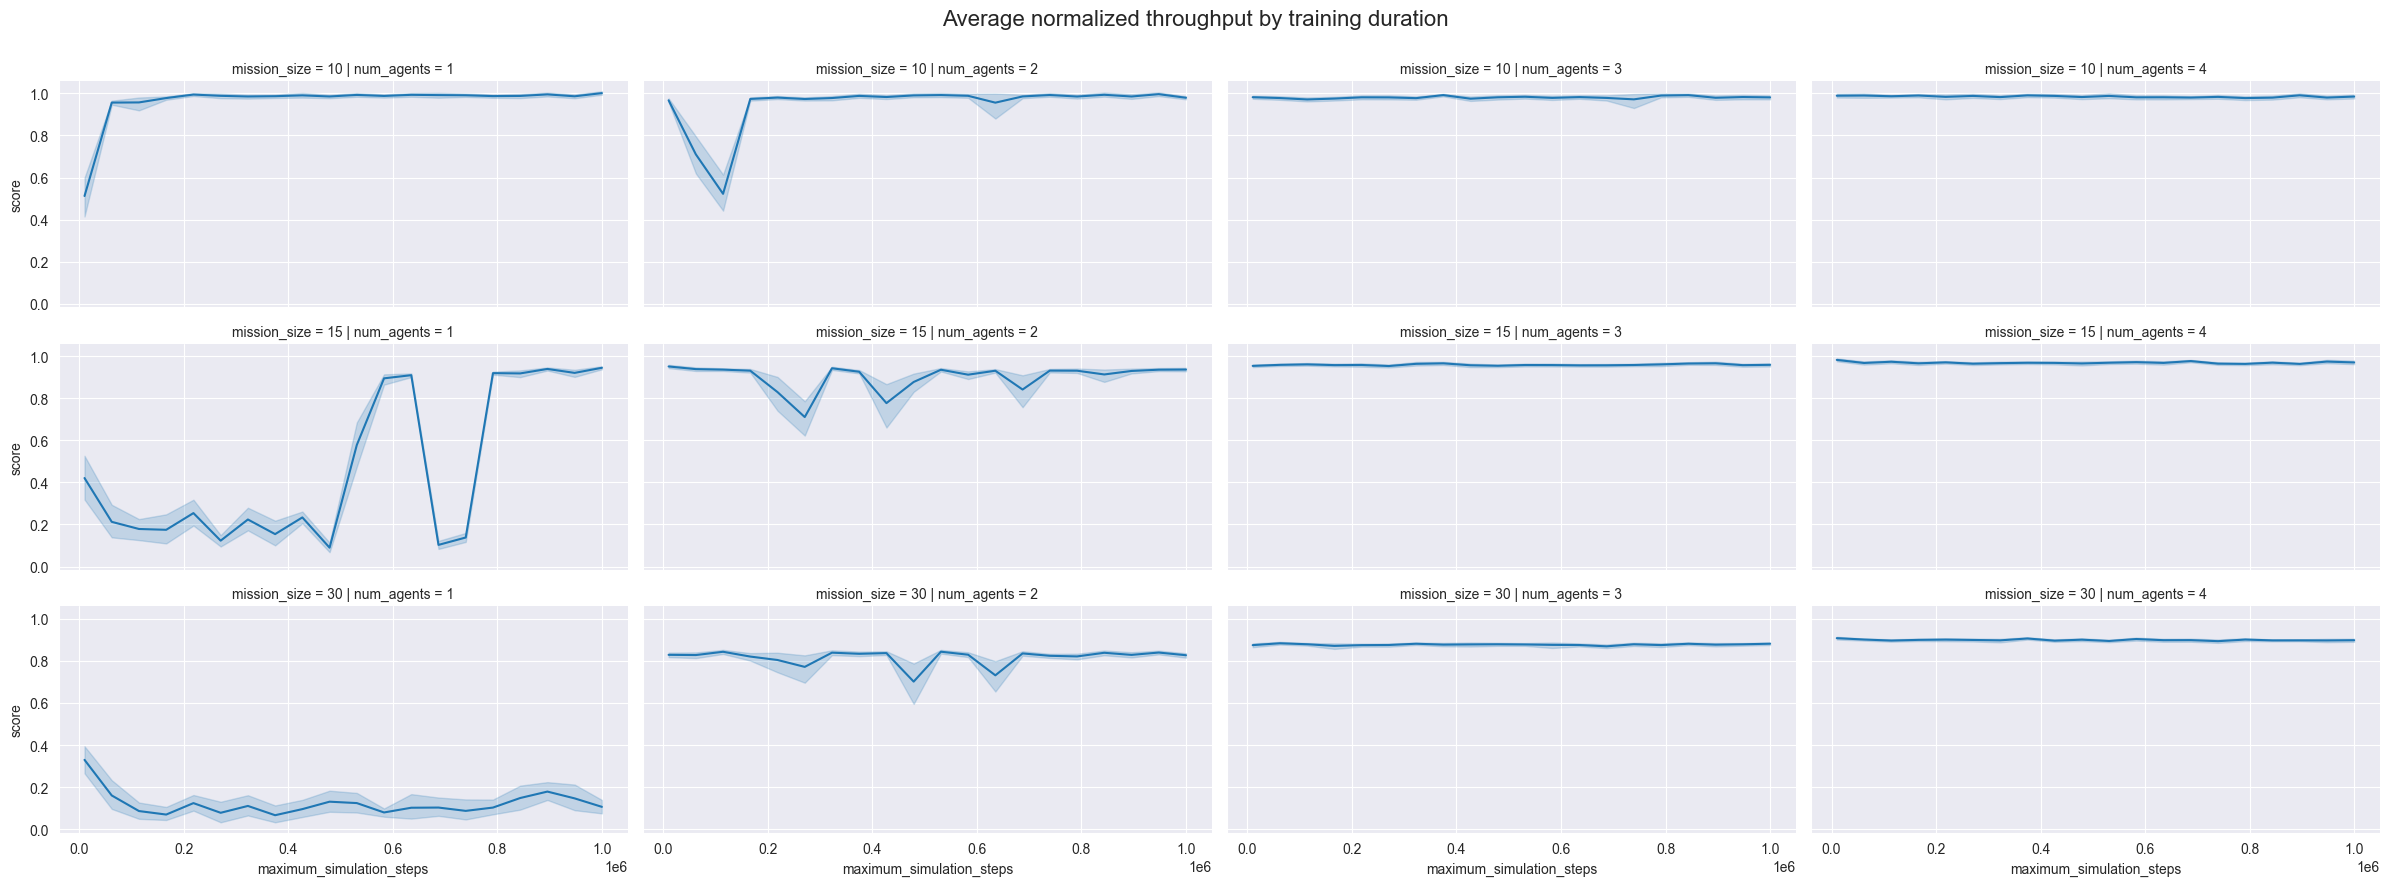

In [55]:
import warnings
q_learning_testing = result_df[result_df['controller'].str.contains('QLearning') & (result_df['training'] == 'False')]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    q_learning_testing['maximum_simulation_steps'] = pd.to_numeric(q_learning_testing['maximum_simulation_steps'])

grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='score')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average normalized throughput by training duration', fontsize=16)

plt.show()